In [2]:
# Basic Libraries|
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
scientistData = pd.read_csv('Top_scientists_2023.csv')
scientistData.head()
scientistData.shape

(217097, 47)

## Making Sense of the Data!

In [4]:
#Cutting to top 100k 
sci100k_Data = scientistData[:-117097]
sci100k_Data.head(20)

,authfull,inst_name,cntry,np6023,firstyr,lastyr,rank (ns),nc9623 (ns),h23 (ns),hm23 (ns),...,nc9623_rw,sm-subfield-1,sm-subfield-1-frac,sm-subfield-2,sm-subfield-2-frac,sm-field,sm-field-frac,rank sm-subfield-1,rank sm-subfield-1 (ns),sm-subfield-1 count
0,"Graetzel, Michael",École Polytechnique Fédérale de Lausanne,che,1760,1971,2024,1,365234,270,117.269725,...,125,Nanoscience & Nanotechnology,0.200796,Chemical Physics,0.123436,Enabling & Strategic Technologies,0.410694,2,1,135958
1,"Wang, Zhong Lin",Chinese Academy of Sciences,chn,2644,1986,2025,2,279327,250,129.899914,...,162,Nanoscience & Nanotechnology,0.576952,Materials,0.101971,Enabling & Strategic Technologies,0.739955,1,2,135958
2,"Willett, Walter C.",Harvard T.H. Chan School of Public Health,usa,2416,1970,2024,3,346654,306,122.561857,...,174,Epidemiology,0.189627,Nutrition & Dietetics,0.164315,Clinical Medicine,0.529461,1,1,9875
3,"Kresse, Georg",Universität Wien,aut,388,1992,2024,4,297085,109,49.890597,...,34,Applied Physics,0.420103,Chemical Physics,0.252577,Physics & Astronomy,0.884021,1,1,304738
4,"Kessler, Ronald C.",Harvard Medical School,usa,1098,1975,2024,5,267255,237,86.248917,...,69,Psychiatry,0.595628,Public Health,0.053734,Clinical Medicine,0.776867,1,1,80339
5,"Friston, Karl",University College London,gbr,1270,1989,2024,6,188600,200,106.582984,...,45,Neurology & Neurosurgery,0.513428,Experimental Psychology,0.113744,Clinical Medicine,0.672986,1,1,341636
6,"Altman, Douglas G.",University of Oxford Medical Sciences Division,gbr,1043,1972,2024,7,566794,254,106.984801,...,318,General & Internal Medicine,0.361804,Oncology & Carcinogenesis,0.049904,Clinical Medicine,0.844530,1,1,333256
7,"McEwen, Bruce S.",Rockefeller University,usa,1205,1959,2023,8,153846,190,111.878948,...,45,Neurology & Neurosurgery,0.482008,Endocrinology & Metabolism,0.155649,Clinical Medicine,0.879498,2,2,341636
8,"Whitesides, George M.",Harvard Faculty of Arts and Sciences,usa,1389,1962,2023,9,244615,223,113.458896,...,68,General Chemistry,0.209689,Organic Chemistry,0.128706,Chemistry,0.509761,1,1,53171
9,"Witten, Edward",Institute for Advanced Study,usa,319,1970,2024,10,101514,137,108.916667,...,20,Nuclear & Particle Physics,0.677316,Mathematical Physics,0.105431,Physics & Astronomy,0.894569,1,1,151105


In [5]:
sci100k_Data.columns

Index(['authfull', 'inst_name', 'cntry', 'np6023', 'firstyr', 'lastyr',
       'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)',
       'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs', 'cpsf', 'ncsf',
       'npsfl', 'ncsfl', 'c', 'npciting', 'cprat', 'np6023 cited9623',
       'np6023_rw', 'nc9623_to_rw', 'nc9623_rw', 'sm-subfield-1',
       'sm-subfield-1-frac', 'sm-subfield-2', 'sm-subfield-2-frac', 'sm-field',
       'sm-field-frac', 'rank sm-subfield-1', 'rank sm-subfield-1 (ns)',
       'sm-subfield-1 count'],
      dtype='object')

In our problem, we will be working with data regarding all citations! As such, we are removing those that exclude self-citations. We are also removing any strings in the dataset, as they do not help with the data analysis. 

In [6]:
#restrict to "self-citations excluded" dataset
sci100k = sci100k_Data.drop(['authfull', 'inst_name', 'cntry', 'rank (ns)', 'nc9623 (ns)', 'h23 (ns)', 'hm23 (ns)', 'nps (ns)',
       'ncs (ns)', 'cpsf (ns)', 'ncsf (ns)', 'npsfl (ns)', 'ncsfl (ns)',
       'c (ns)', 'npciting (ns)', 'cprat (ns)', 'np6023 cited9623 (ns)', 'sm-subfield-1', 'sm-subfield-2','sm-subfield-1 count','rank sm-subfield-1','rank sm-subfield-1 (ns)'], axis = 1)
sci100k.head(20)

,np6023,firstyr,lastyr,self%,rank,nc9623,h23,hm23,nps,ncs,...,npciting,cprat,np6023 cited9623,np6023_rw,nc9623_to_rw,nc9623_rw,sm-subfield-1-frac,sm-subfield-2-frac,sm-field,sm-field-frac
0,1760,1971,2024,0.0692,2,392395,281,120.981965,59,30508,...,142509,2.753475,1688,1,8,125,0.200796,0.123436,Enabling & Strategic Technologies,0.410694
1,2644,1986,2025,0.1475,1,327659,275,140.601151,115,22775,...,128016,2.559516,2461,0,0,162,0.576952,0.101971,Enabling & Strategic Technologies,0.739955
2,2416,1970,2024,0.0917,3,381657,320,127.503846,123,12742,...,220721,1.729138,2253,0,0,174,0.189627,0.164315,Clinical Medicine,0.529461
3,388,1992,2024,0.0203,4,303251,117,51.704883,6,60117,...,135764,2.233663,379,0,0,34,0.420103,0.252577,Physics & Astronomy,0.884021
4,1098,1975,2024,0.0613,6,284705,249,89.943757,39,7088,...,181084,1.572226,1067,0,0,69,0.595628,0.053734,Clinical Medicine,0.776867
5,1270,1989,2024,0.1035,5,210372,215,114.742940,100,20296,...,105494,1.994161,1179,0,0,45,0.513428,0.113744,Clinical Medicine,0.672986
6,1043,1972,2024,0.0271,9,582575,258,108.470949,77,5099,...,428127,1.360753,970,0,0,318,0.361804,0.049904,Clinical Medicine,0.844530
7,1205,1959,2023,0.0803,7,167287,197,115.902036,131,28290,...,89602,1.867001,1145,0,0,45,0.482008,0.155649,Clinical Medicine,0.879498
8,1389,1962,2023,0.0520,10,258023,229,117.547785,41,10005,...,148677,1.735460,1324,0,0,68,0.209689,0.128706,Chemistry,0.509761
9,319,1970,2024,0.0125,11,102804,139,110.750000,155,57996,...,61574,1.669601,304,0,0,20,0.677316,0.105431,Physics & Astronomy,0.894569


In [7]:
sci100k.shape

(100000, 25)

In [8]:
sci100k.columns

Index(['np6023', 'firstyr', 'lastyr', 'self%', 'rank', 'nc9623', 'h23', 'hm23',
       'nps', 'ncs', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',
       'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field',
       'sm-field-frac'],
      dtype='object')

In [9]:
##add in a feature actyr to reflect active years of research
sci100k['actyr'] = sci100k['lastyr'] - sci100k['firstyr']

##add in features npf (number of first authored papers) and ncf (total cites to first authored papers). 
#this is to create more features for us to analyse their correlation to rank
sci100k['npf'] = sci100k['cpsf'] - sci100k['nps']
sci100k['ncf'] = sci100k['ncsf'] - sci100k['ncs']

##we can also remove firstyr and lastyr since we have created actyr
sci100k = sci100k.drop(['firstyr', 'lastyr'], axis = 1)

In [10]:
sci100k.columns

Index(['np6023', 'self%', 'rank', 'nc9623', 'h23', 'hm23', 'nps', 'ncs',
       'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting', 'cprat',
       'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw',
       'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field', 'sm-field-frac',
       'actyr', 'npf', 'ncf'],
      dtype='object')

For easier visualisation, we split the dataset into 4 parts prior to creating correlation heatmaps!
We will look for features that have a correlation of at least 0.3 as the more important features.

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields (1)')

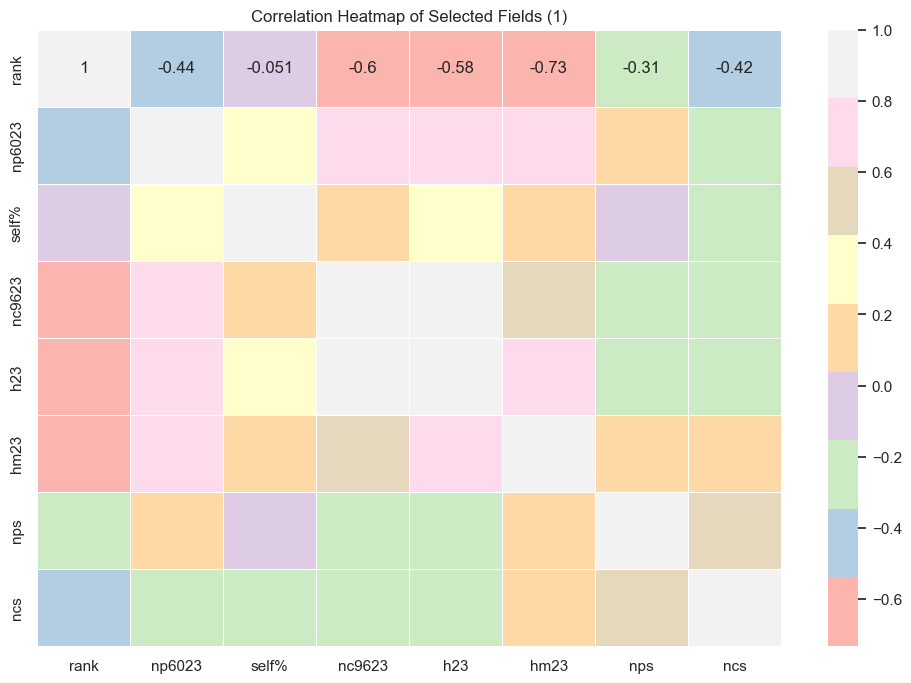

In [11]:
sci100k_1 = pd.DataFrame(sci100k[['rank','np6023', 'self%', 'nc9623', 'h23', 'hm23', 'nps', 'ncs']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_1.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (1)')

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields (2)')

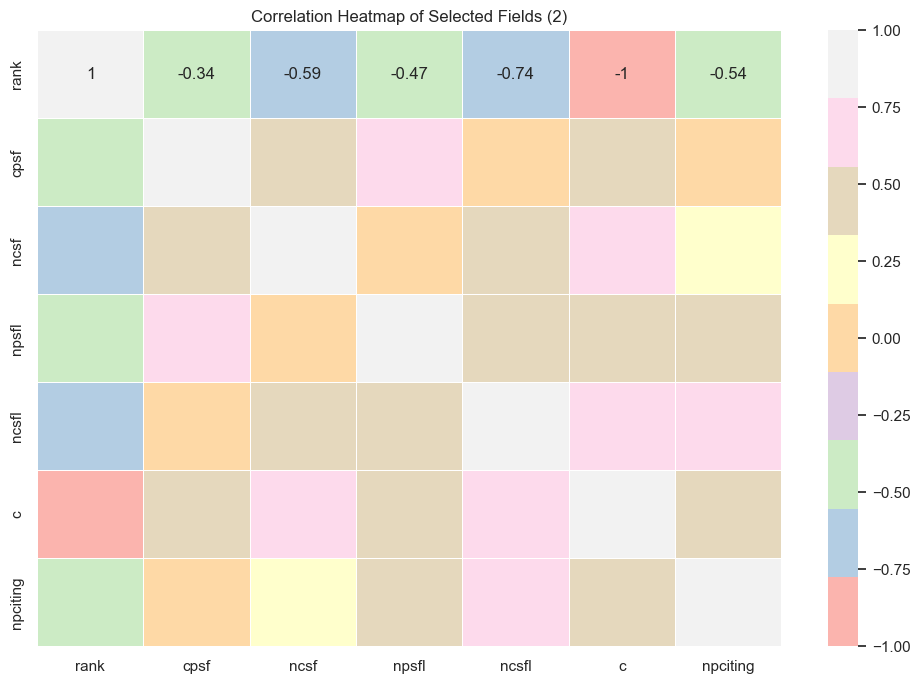

In [12]:
sci100k_2 = pd.DataFrame(sci100k[['rank', 'cpsf', 'ncsf', 'npsfl', 'ncsfl', 'c', 'npciting',]])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_2.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (2)')

Note: we are trying to create a feature that has a higher correlation score than c

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields')

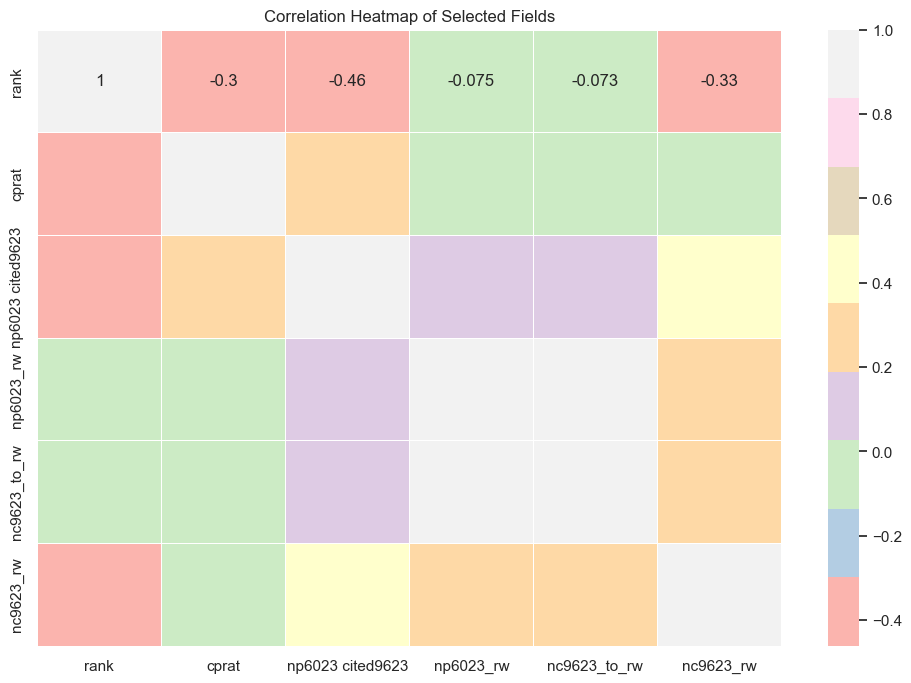

In [13]:
sci100k_3 = pd.DataFrame(sci100k[['rank', 'cprat', 'np6023 cited9623', 'np6023_rw', 'nc9623_to_rw', 'nc9623_rw']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_3.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields')

Text(0.5, 1.0, 'Correlation Heatmap of Selected Fields (4)')

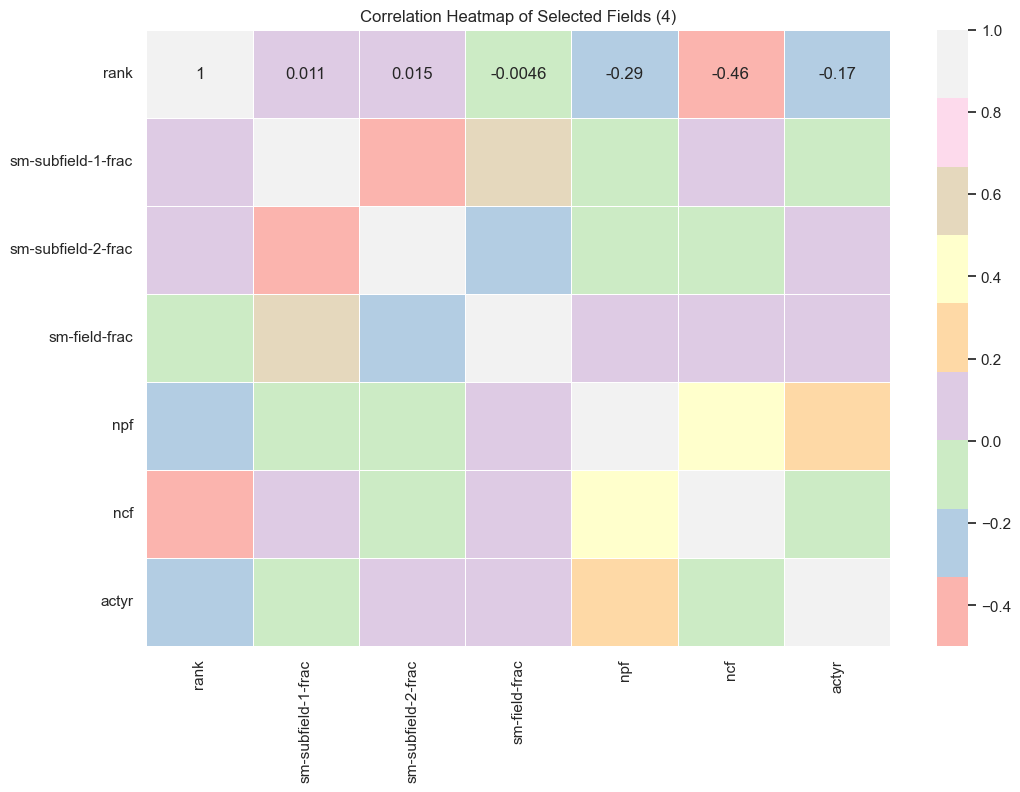

In [14]:
sci100k_4 = pd.DataFrame(sci100k[['rank', 'sm-subfield-1-frac', 'sm-subfield-2-frac', 'sm-field-frac', 'npf', 'ncf', 'actyr']])
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_4.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Fields (4)')

From analysing the 4 heatmaps above, here is a DataFrame solely consisting of features having a correlation of at least 0.3. We have removed 'ncf' as it is derived off 'ncsf', but has a lower correlation score.

In [15]:
sci100k_impt = pd.DataFrame(sci100k[['rank', 'np6023', 'nc9623', 'h23', 'hm23', 'ncsf', 'npsfl', 'ncsfl', 'npciting', 'np6023 cited9623']])

In [16]:
sci100k_impt.head()

,rank,np6023,nc9623,h23,hm23,ncsf,npsfl,ncsfl,npciting,np6023 cited9623
0,2,1760,392395,281,120.981965,32280,943,252230,142509,1688
1,1,2644,327659,275,140.601151,41009,1966,264116,128016,2461
2,3,2416,381657,320,127.503846,37917,826,142359,220721,2253
3,4,388,303251,117,51.704883,260685,194,279757,135764,379
4,6,1098,284705,249,89.943757,131235,572,204328,181084,1067


Text(0.5, 1.0, 'Correlation Heatmap of Features with Corr < -0.3')

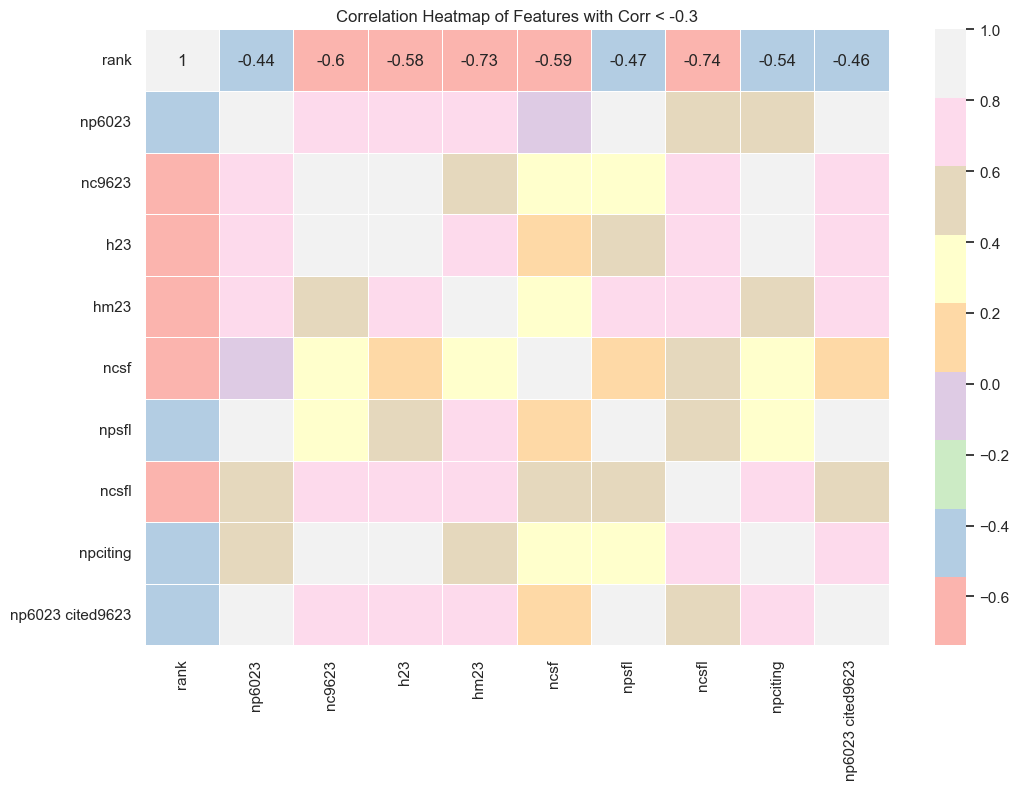

In [17]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')

Text(0.5, 1.0, 'Correlation Heatmap of Features with Corr < -0.3')

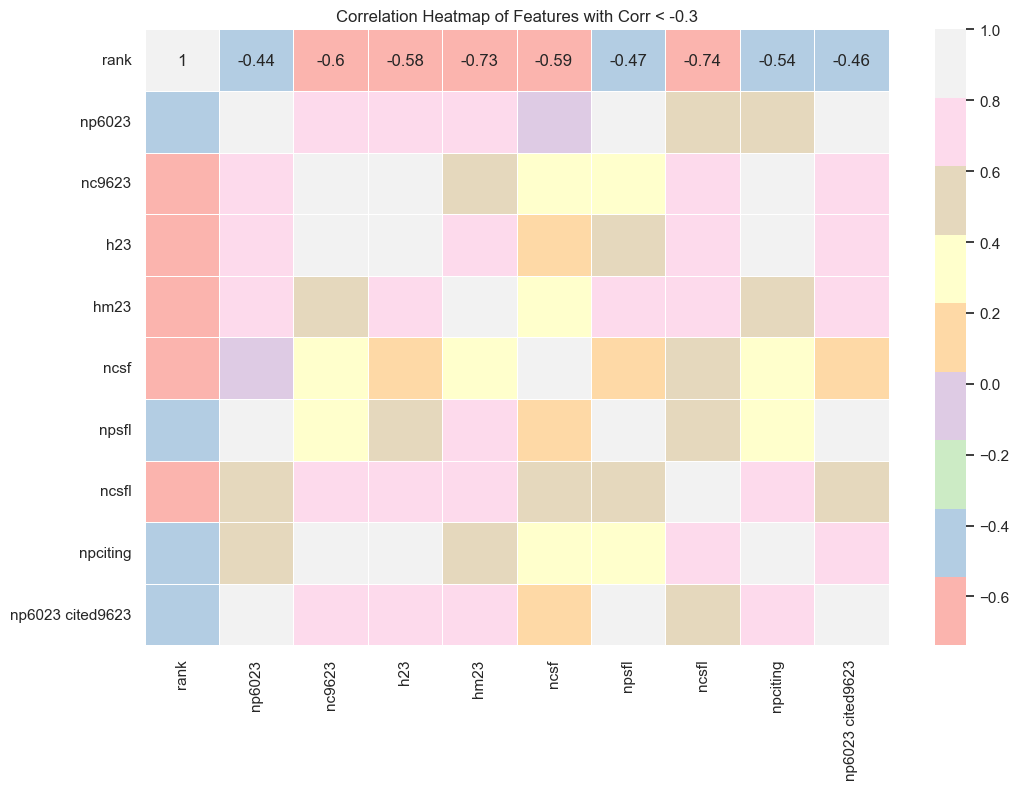

In [18]:
##other corr methods:
plt.figure(figsize=(12, 8))
sb.heatmap(sci100k_impt.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Features with Corr < -0.3')

# Attempting to take reciprocals to find corr

In [19]:
scireci = pd.DataFrame(sci100k_impt['rank'])
scireci['renp6023'] = 1/sci100k_impt['np6023']
scireci['rehm23'] = 1/sci100k_impt['hm23']
scireci['renc9623'] = 1/sci100k_impt['nc9623']
scireci['rencsf'] = 1/sci100k_impt['ncsf']
scireci['renpsfl'] = 1/sci100k_impt['npsfl']
scireci['rencsfl'] = 1/sci100k_impt['ncsfl']
scireci['renpciting'] = 1/sci100k_impt['npciting']
scireci['renp6023 cited9623'] = 1/sci100k_impt['np6023 cited9623']

Text(0.5, 1.0, 'Correlation Heatmap of Reciprocal Features')

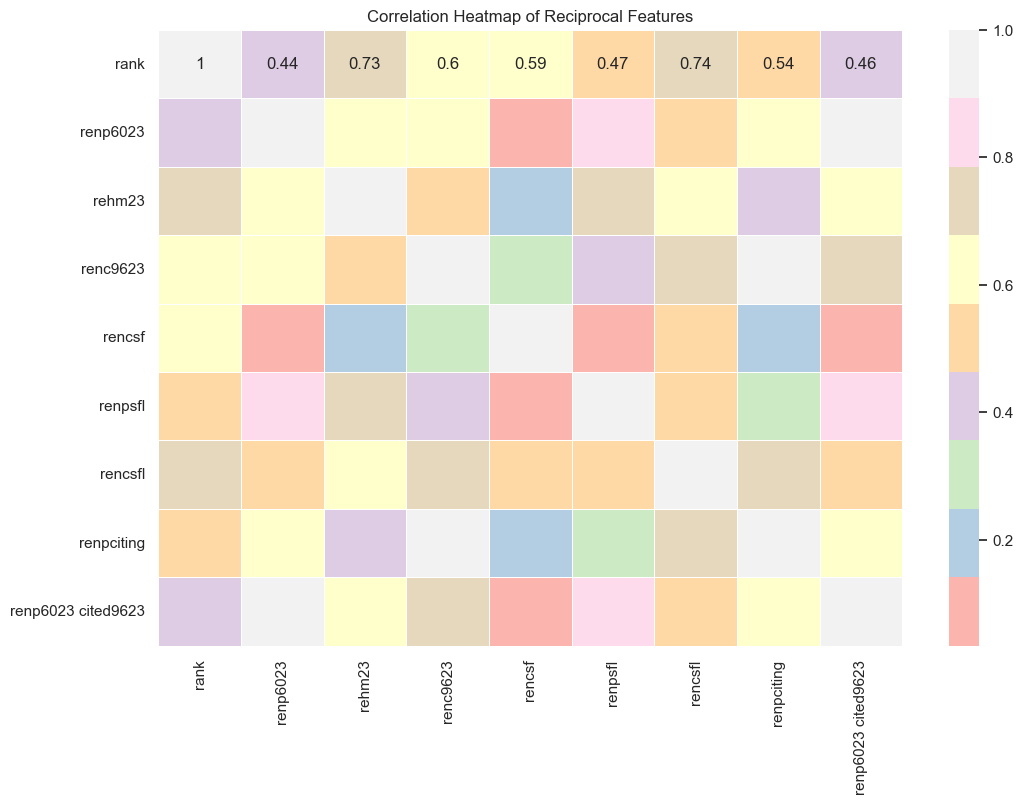

In [20]:
plt.figure(figsize=(12, 8))
sb.heatmap(scireci.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Reciprocal Features')

# Attempting to square root to find corr

In [21]:
scisqr = pd.DataFrame(sci100k_impt['rank'])
scisqr['sqnp6023'] = sci100k_impt['np6023'] **0.5
scisqr['sqhm23'] = sci100k_impt['hm23'] **0.5
scisqr['sqh23'] = sci100k_impt['h23'] **0.5

scisqr['sqnc9623'] = sci100k_impt['nc9623'] ** 0.5
scisqr['sqncsf'] = sci100k_impt['ncsf'] **0.5
scisqr['sqnpsfl'] = sci100k_impt['npsfl'] **0.5
scisqr['sqncsfl'] = sci100k_impt['ncsfl'] **0.5
scisqr['sqnpciting'] = sci100k_impt['npciting'] **0.5 
scisqr['sqnp6023 cited9623'] = sci100k_impt['np6023 cited9623']**0.5

Text(0.5, 1.0, 'Correlation Heatmap of Squared Features')

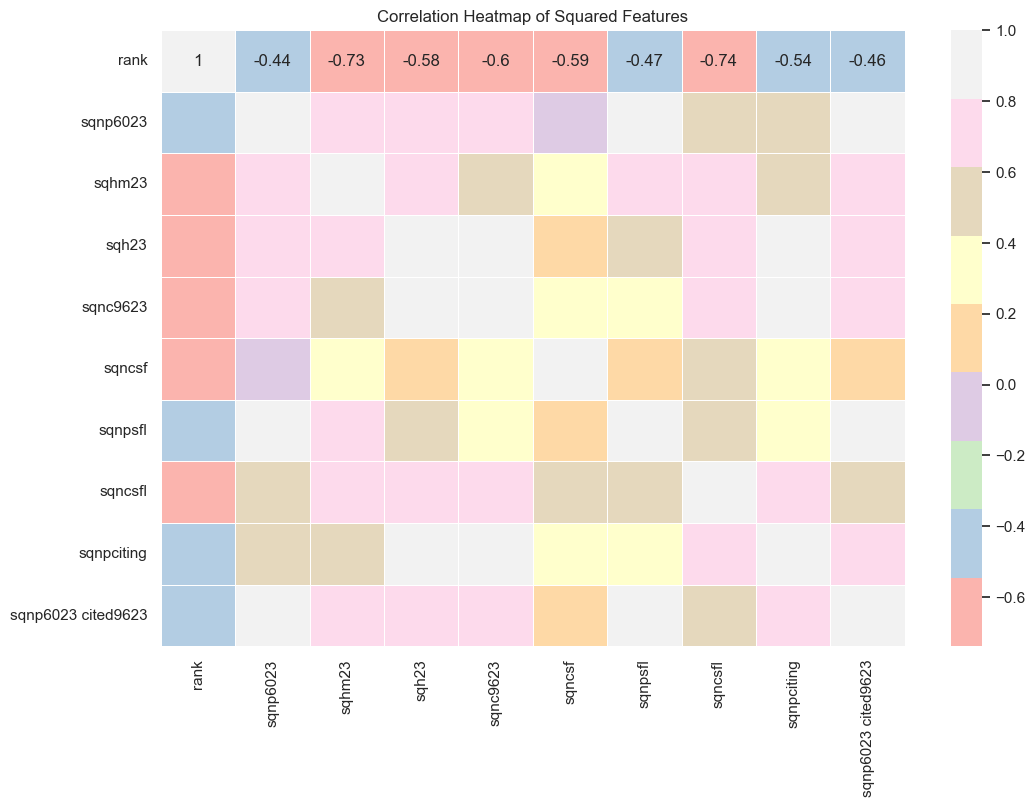

In [22]:
plt.figure(figsize=(12, 8))
sb.heatmap(scisqr.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Squared Features')

## How about log10?

In [23]:
scilog = pd.DataFrame(sci100k_impt['rank'])
scilog['lognp6023'] = np.log10(sci100k_impt['np6023'])
scilog['loghm23'] = np.log10(sci100k_impt['hm23'])
scilog['logh23'] = np.log10(sci100k_impt['h23'])
scilog['lognc9623'] = np.log10(sci100k_impt['nc9623'])
scilog['logncsf'] = np.log10(sci100k_impt['ncsf'])
scilog['lognpsfl'] = np.log10(sci100k_impt['npsfl'])
scilog['logncsfl'] = np.log10(sci100k_impt['ncsfl'])
scilog['lognpciting'] = np.log10(sci100k_impt['npciting'])
scilog['lognp6023 cited9623'] = np.log10(sci100k_impt['np6023 cited9623'])

C:\Users\aditi\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Correlation Heatmap of Log10 Features')

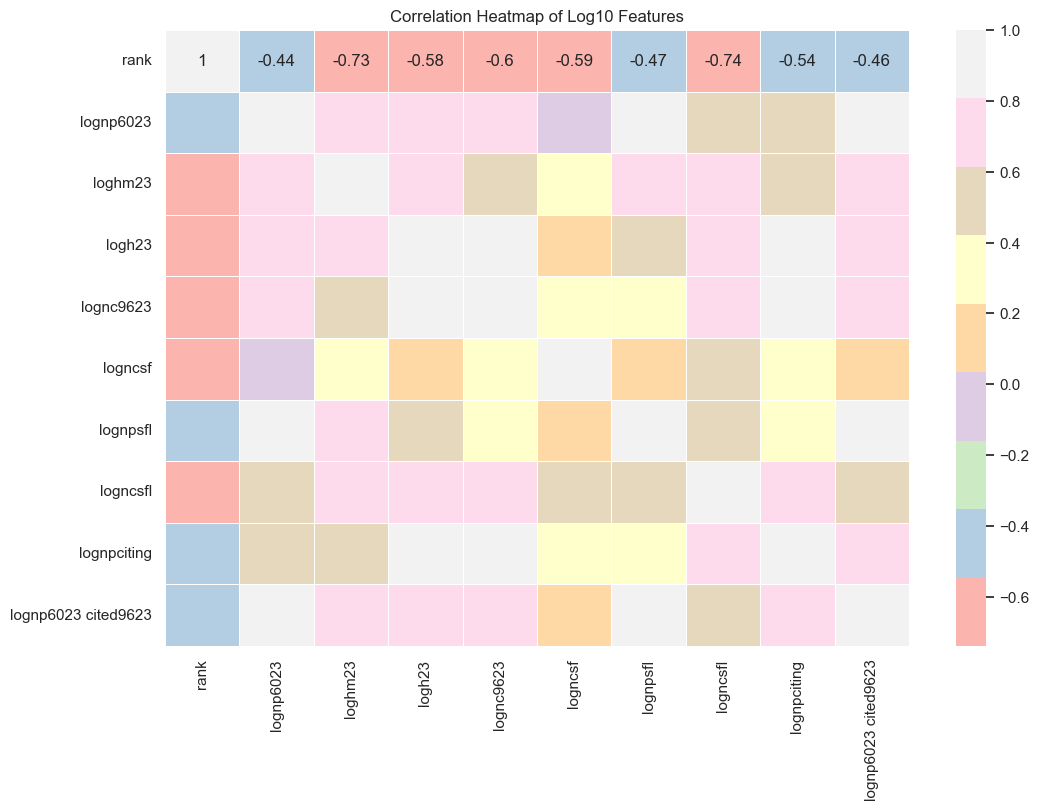

In [24]:
plt.figure(figsize=(12, 8))
sb.heatmap(scilog.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Log10 Features')

It seems that univariate "manipulation" does nothing for Spearman coefficient. Let's try multiplying stuff instead

# Multiply hm23 to everything

In [25]:
sci1 = pd.DataFrame(sci100k_impt['rank'])
sci1['anp6023'] = sci100k_impt['np6023'] * sci100k_impt['hm23']
sci1['ahm23'] = sci100k_impt['hm23']* sci100k_impt['hm23']
sci1['ah23'] = sci100k_impt['h23']* sci100k_impt['h23']
sci1['anc9623'] = sci100k_impt['nc9623']* sci100k_impt['hm23']
sci1['ancsf'] = sci100k_impt['ncsf'] * sci100k_impt['hm23']
sci1['anpsfl'] = sci100k_impt['npsfl']*  sci100k_impt['hm23']
sci1['ancsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['hm23']
sci1['anpciting'] = sci100k_impt['npciting']* sci100k_impt['hm23']
sci1['anp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['hm23']

Text(0.5, 1.0, 'Correlation Heatmap of Added Features')

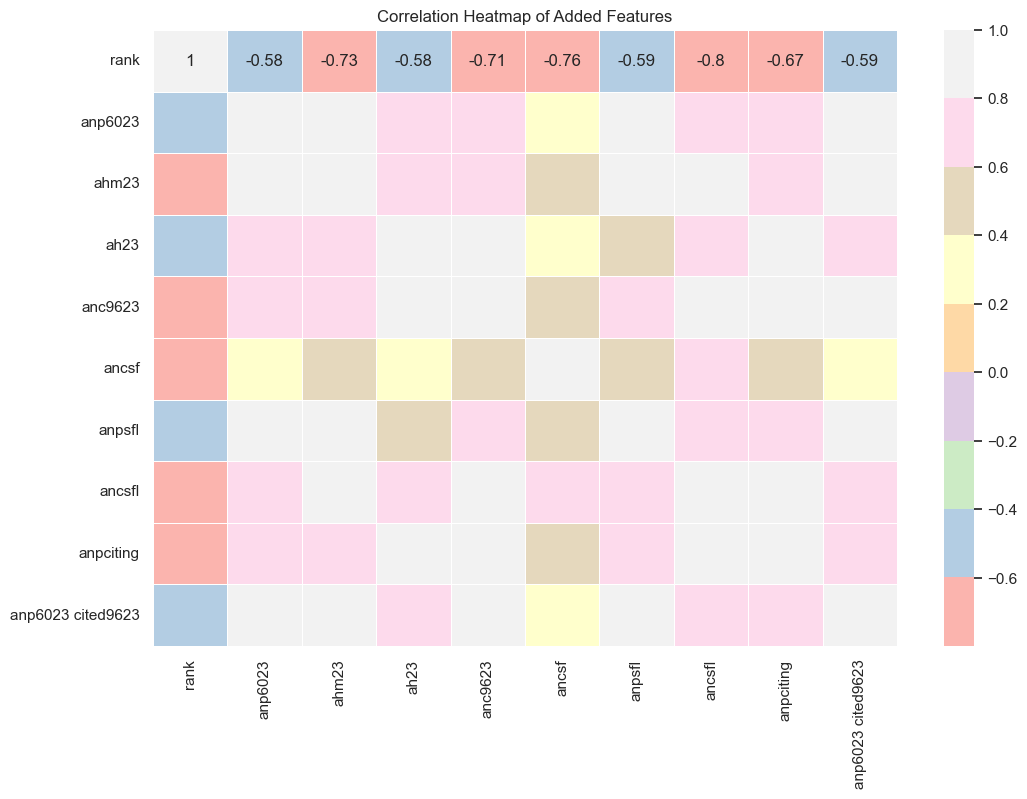

In [26]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci1.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')

# Multiply hm23 to everything

In [27]:
sci2 = pd.DataFrame(sci100k_impt['rank'])
sci2['anp6023'] = sci100k_impt['np6023'] * sci100k_impt['h23']
sci2['ahm23'] = sci100k_impt['hm23']* sci100k_impt['h23']
sci2['ah23'] = sci100k_impt['h23']* sci100k_impt['h23']
sci2['anc9623'] = sci100k_impt['nc9623']* sci100k_impt['h23']
sci2['ancsf'] = sci100k_impt['ncsf'] * sci100k_impt['h23']
sci2['anpsfl'] = sci100k_impt['npsfl']*  sci100k_impt['h23']
sci2['ancsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['h23']
sci2['anpciting'] = sci100k_impt['npciting']* sci100k_impt['h23']
sci2['anp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['h23']

Text(0.5, 1.0, 'Correlation Heatmap of Added Features')

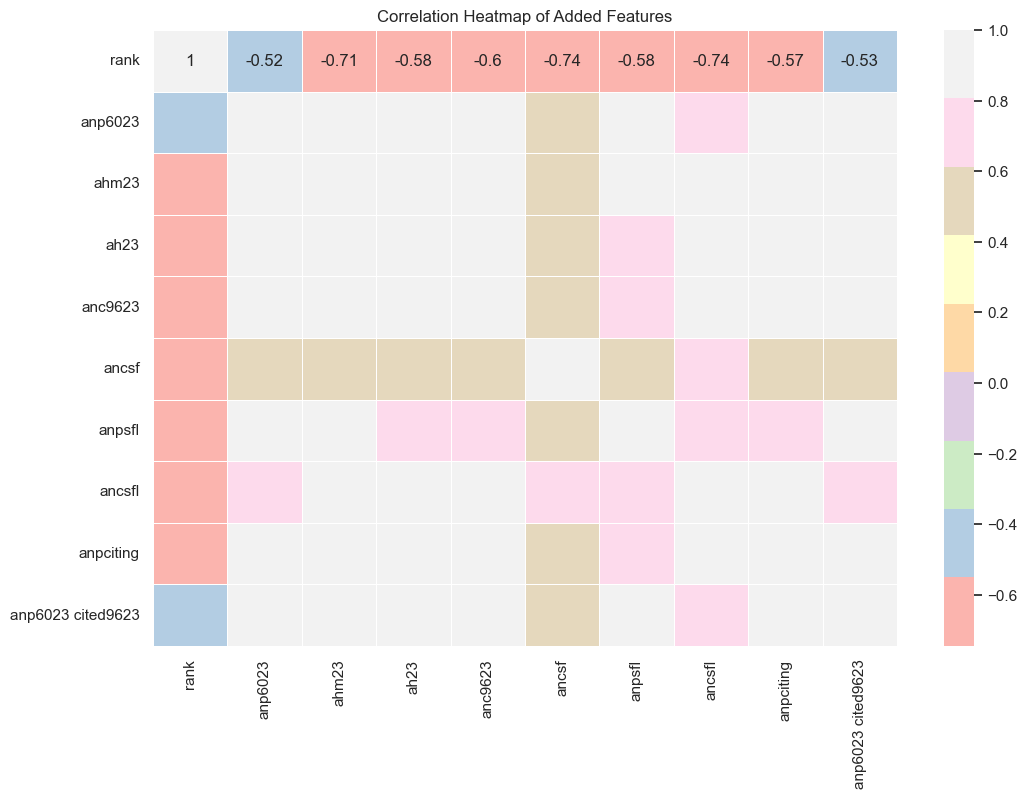

In [28]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci2.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Heatmap of Added Features')

Let's create a new composite index, hcomp23, which is the product of h23 and hm23.

In [29]:
sci100k_impt['hcomp23'] = (sci100k_impt['hm23'] * sci100k_impt['h23'])

In [30]:
sci3 = pd.DataFrame(sci100k_impt['rank'])
sci3['hnp6023'] = sci100k_impt['np6023'] * sci100k_impt['hcomp23']
sci3['hhm23'] = sci100k_impt['hm23']* sci100k_impt['hcomp23']
sci3['hnc9623'] = sci100k_impt['nc9623']* sci100k_impt['hcomp23']
sci3['hncsf'] = sci100k_impt['ncsf'] * sci100k_impt['hcomp23']
sci3['hnpsfl'] = sci100k_impt['npsfl']* sci100k_impt['hcomp23']
sci3['hncsfl'] = sci100k_impt['ncsfl'] * sci100k_impt['hcomp23']
sci3['hnpciting'] = sci100k_impt['npciting'] * sci100k_impt['hcomp23']
sci3['hnp6023 cited9623'] = sci100k_impt['np6023 cited9623']* sci100k_impt['hcomp23']

Text(0.5, 1.0, "Correlation Heatmap of Comp'd Features")

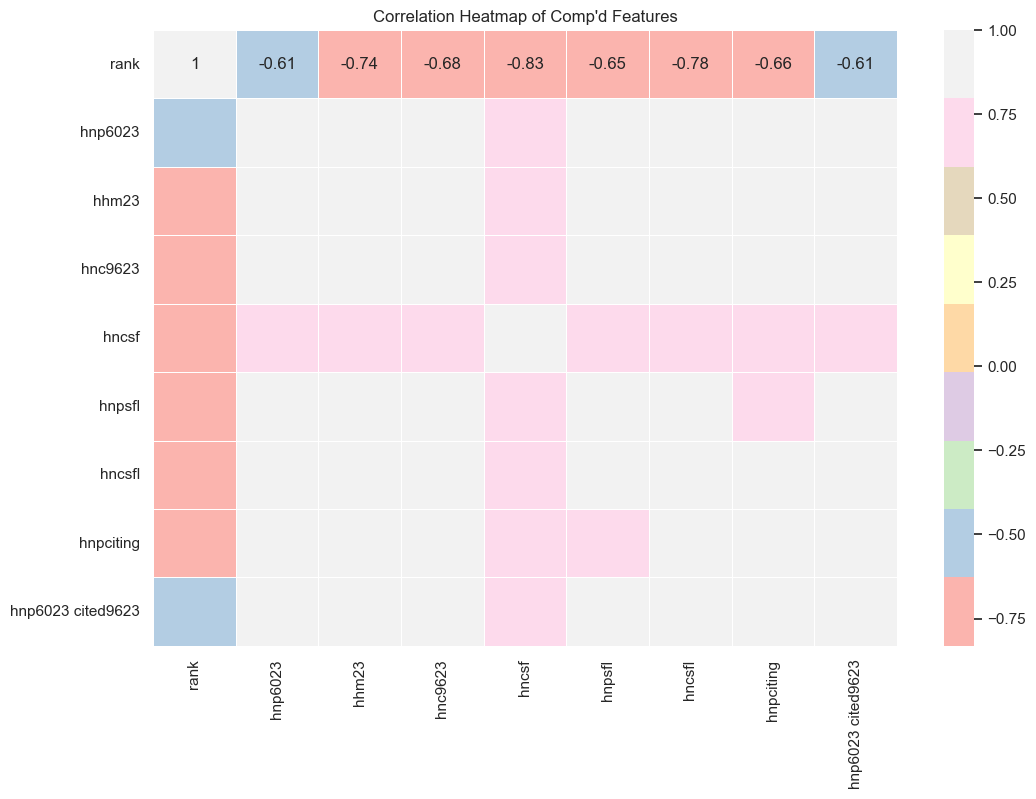

In [31]:
plt.figure(figsize=(12, 8))
sb.heatmap(sci3.corr(method = 'spearman'), annot=True, cmap='Pastel1', linewidths=0.5)
plt.title("Correlation Heatmap of Comp'd Features")

In [41]:
scibayes = pd.DataFrame(sci100k_impt[['hm23','h23','ncsf']])
scibayes['hncsf']=sci3['hncsf']/10**9
scibayes['h3'] = scibayes['hncsf']* sci100k['ncsfl']
scibayes['ncsfl']=sci100k['ncsfl']

In [42]:
scibayes.head()

,hm23,h23,ncsf,hncsf,h3,ncsfl
0,120.981965,281,32280,1.097389,276794.350417,252230
1,140.601151,275,41009,1.585626,418789.188849,264116
2,127.503846,320,37917,1.547060,220237.952382,142359
3,51.704883,117,260685,1.577006,441178.586785,279757
4,89.943757,249,131235,2.939138,600548.284268,204328


In [43]:
scibayes['h3'].describe()

count    100000.000000
mean        238.174652
std        4307.060060
min           0.202685
25%           5.475410
50%          14.176386
75%          49.125189
max      600548.284268
Name: h3, dtype: float64

Seems that we're getting closer

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features and target variable
# Replace 'target_column' with the actual name of the target (classification label)
X = scibayes[['hm23','h23','ncsf','ncsfl']]
y = scibayes['h3']

y_binned = pd.cut(y, bins=[-np.inf,14.176386, 49.125189, np.inf], labels=['Class A', 'Class B', 'Class C'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Choose a Naive Bayes classifier
# Use GaussianNB for continuous data, MultinomialNB for counts or frequency data, BernoulliNB for binary features
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

     Class A       0.89      0.93      0.91      9962
     Class B       0.59      0.71      0.65      5033
     Class C       0.90      0.63      0.74      5005

    accuracy                           0.80     20000
   macro avg       0.79      0.76      0.77     20000
weighted avg       0.82      0.80      0.80     20000


Confusion Matrix:
 [[9274  594   94]
 [1187 3589  257]
 [   0 1850 3155]]


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features and target variable
# Replace 'target_column' with the actual name of the target (classification label)
X = scibayes[['hm23','h23','ncsf']]
y = scibayes['hncsf']

y_binned = pd.cut(y, bins=[-np.inf,  0.002554,0.005703 , np.inf], labels=['Class A', 'Class B', 'Class C'])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Choose a Naive Bayes classifier
# Use GaussianNB for continuous data, MultinomialNB for counts or frequency data, BernoulliNB for binary features
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

     Class A       0.81      0.93      0.86      9969
     Class B       0.48      0.48      0.48      4977
     Class C       0.84      0.58      0.69      5054

    accuracy                           0.73     20000
   macro avg       0.71      0.66      0.68     20000
weighted avg       0.73      0.73      0.72     20000


Confusion Matrix:
 [[9242  535  192]
 [2227 2401  349]
 [   0 2105 2949]]


In [46]:
scibayes['hncsf'].describe()

count    100000.000000
mean          0.007379
std           0.029354
min           0.000057
25%           0.001366
50%           0.002554
75%           0.005703
max           2.939138
Name: hncsf, dtype: float64